Goal - correct error in the previous code by using the number of wild fish when the number of hatchery fish is maximum


In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sys import platform
from datetime import timedelta
import matplotlib.gridspec as gridspec

if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/"
    output_string = "/home/maria/Documents/output/pied_piper/"
else:
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/"

In [2]:
#dungeness

### read csv file with hatchery releases

df = pd.read_csv(data_string + "dungeness/dungeness_all_days_hatchery_release.csv", header = 0)

df['Date'] = pd.to_datetime(df['Date'])


# make a column for proportion of wild fish for each fishtype

species = ["chinook", "coho"]
age = ["0","1"]

for i in species:
    for j in age:
        fish_type_wild = i + j + '_wild_num'
        fish_type_hatchery = i + j + '_hatchery_num'
        fish_type_prop = i + j + '_prop_wild'
        try:
#             print(df[fish_type_wild]/(df[fish_type_hatchery] + df[fish_type_wild]))
            df[fish_type_prop] = df[fish_type_wild]/(df[fish_type_hatchery] + df[fish_type_wild])
        except KeyError:
            print("no data for fish type")

no data for fish type


In [8]:
#Coho1


coho1_list = df['Date'][~np.isnan(df['coho1_hatchery_total_release'])]
# print(coho1_list)

prop_coho1_list = []
coho1_hatchery_list = []
coho1_hatchery_num_list = []
coho1_wild_list = []
coho1_wild_num_list = []
coho1_prop_wild_list = []

for i in coho1_list.index:
    
    index = df['coho1_hatchery_perhour'][df['coho1_hatchery_perhour']==
                                       np.max(df['coho1_hatchery_perhour'][i:i+10])].index[0]
    print(index)
    coho1_hatchery_list.append(df['coho1_hatchery_perhour'][index])
    coho1_hatchery_num_list.append(df['coho1_hatchery_num'][index])
    coho1_wild_list.append(df['coho1_wild_perhour'][index])
    coho1_wild_num_list.append(df['coho1_wild_num'][index])
    coho1_prop_wild_list.append(df['coho1_wild_perhour'][index]/(
        df['coho1_hatchery_perhour'][index]+df['coho1_wild_perhour'][index]))
    
data_unmarked = np.array([coho1_list, df['coho1_untagged_unclipped'][coho1_list.index], 
                          coho1_wild_num_list, coho1_hatchery_num_list,
                          df['coho1_untagged_unclipped_prop'][coho1_list.index],
                          coho1_prop_wild_list])

data_unmarked_dungeness_coho = pd.DataFrame(np.transpose(data_unmarked), columns = ['coho1_dungeness_Date',
                                                                               'coho1_dungeness_unmarked', 
                                                                               'coho1_dungeness_wild_num',
                                                                                    'coho1_dungeness_hatchery_num',
                                                                               'coho1_dungeness_unmarked_prop', 
                                                                               'coho1_dungeness_wild_prop'])
data_unmarked_dungeness_coho['coho1_dungeness_year'] = data_unmarked_dungeness_coho['coho1_dungeness_Date'].dt.year

data_unmarked_dungeness_coho

62
428
453
816
824
1183
1546
1898
2271
2628
2993
3358
3724
4090
4456
4823
5186
5552


,coho1_dungeness_Date,coho1_dungeness_unmarked,coho1_dungeness_wild_num,coho1_dungeness_hatchery_num,coho1_dungeness_unmarked_prop,coho1_dungeness_wild_prop,coho1_dungeness_year
0,2005-05-03,8968,54,993,0.0175002,0.0469327,2005
1,2006-05-01,309,63,7,0.0259664,0.9,2006
2,2006-06-01,12691,3,163,0.0260008,0.01749,2006
3,2007-06-01,6979,0,435,0.0139024,0,2007
4,2007-06-10,0,17,138,0,0.109481,2007
5,2008-06-01,2983,32,1993,0.00556219,0.0155596,2008
6,2009-06-01,6515,4,1101,0.0121424,0.00240751,2009
7,2010-05-19,3806,62,889,0.00704815,0.0674792,2010
8,2011-05-23,2112,18,816,0.00390028,0.0222377,2011
9,2012-05-16,5736,9,491,0.0105008,0.0148998,2012


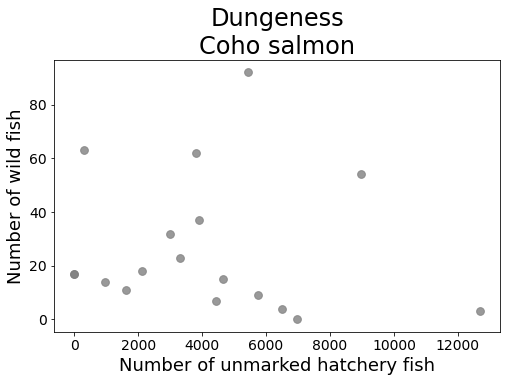

In [9]:
fig2 = plt.figure(figsize=(8,5))
plt.scatter(data_unmarked_dungeness_coho['coho1_dungeness_unmarked'],
           data_unmarked_dungeness_coho['coho1_dungeness_wild_num'], alpha = 0.8, color = 'gray', s = 60)
plt.xlabel('Number of unmarked hatchery fish', fontsize = 18)
plt.ylabel('Number of wild fish', fontsize = 18)
plt.title('Dungeness\nCoho salmon', fontsize  = 24)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig(output_string + 'dungeness/hatchery_coho1_uamarked_hatchery.jpeg')

In [31]:
chinook0_list = df['Date'][~np.isnan(df['chinook0_hatchery_total_release'])]
# print(chinook0_list)

chinook0_hatchery_list = []
chinook0_hatchery_num_list = []
chinook0_wild_list = []
chinook0_wild_num_list = []
chinook0_prop_wild_list = []
# fig = plt.figure(figsize=(15,10))
for i in chinook0_list.index:
    if len(df['chinook0_hatchery_perhour']) < i+10:
        length_dataframe =  len(df['chinook0_hatchery_perhour'])
    else:
        length_dataframe = i+10
    if np.isnan(np.max(df['chinook0_hatchery_perhour'][i:length_dataframe])):
        chinook0_hatchery_list.append(np.nan)
        chinook0_hatchery_num_list.append(np.nan)
        chinook0_wild_list.append(np.nan)
        chinook0_wild_num_list.append(np.nan)
        chinook0_prop_wild_list.append(np.nan)
    else:
        index = df['chinook0_hatchery_perhour'][df['chinook0_hatchery_perhour']==
                                                np.max(df['chinook0_hatchery_perhour'][i:length_dataframe])].index[0]
        chinook0_hatchery_list.append(df['chinook0_hatchery_perhour'][index])
        chinook0_hatchery_num_list.append(df['chinook0_hatchery_num'][index])
        chinook0_wild_list.append(df['chinook0_wild_perhour'][index])
        chinook0_wild_num_list.append(df['chinook0_wild_num'][index])
        chinook0_prop_wild_list.append(df['chinook0_wild_perhour'][index]/(
            df['chinook0_hatchery_perhour'][index]+df['chinook0_wild_perhour'][index]))
# print(chinook0_prop_wild_list)

data_unmarked_chinook = np.array([chinook0_list, 
                                  df['chinook0_untagged_unclipped'][chinook0_list.index],
                                  chinook0_wild_num_list,
                                  chinook0_hatchery_num_list,
                                  df['chinook0_untagged_unclipped_prop'][chinook0_list.index],
                                  chinook0_prop_wild_list])

data_unmarked_dungeness_chinook = pd.DataFrame(np.transpose(data_unmarked_chinook), columns = ['chinook0_dungeness_Date',
                                                                               'chinook0_dungeness_unmarked', 
                                                                               'chinook0_dungeness_wild_num',
                                                                                'chinook0_dungeness_hatchery_num',
                                                                               'chinook0_dungeness_unmarked_prop', 
                                                                               'chinook0_dungeness_wild_prop'])
# data_unmarked_dungeness_chinook['chinook0_dungeness_year'] = data_unmarked_dungeness_chinook['chinook0_dungeness_Date'].dt.year

data_unmarked_dungeness_chinook

# np.transpose(data_unmarked_chinook)



,chinook0_dungeness_Date,chinook0_dungeness_unmarked,chinook0_dungeness_wild_num,chinook0_dungeness_hatchery_num,chinook0_dungeness_unmarked_prop,chinook0_dungeness_wild_prop
0,2006-06-03,1090,25,106,0.02,0.195492
1,2006-06-21,1296,26,73,0.024,0.265182
2,2006-11-15,3800,NaN,NaN,1,NaN
3,2007-05-18,765,21,2922,0.015,0.00704435
4,2007-06-13,1495,210,3276,0.0290066,0.0595731
5,2008-05-21,3224,50,233,0.065,0.187741
6,2008-06-25,3643,38,450,0.0738945,0.0778689
7,2009-05-14,583,19,143,0.011904,0.117358
8,2009-06-13,881,49,345,0.0177085,0.124178
9,2010-06-02,706,5,458,0.0140079,0.0107991


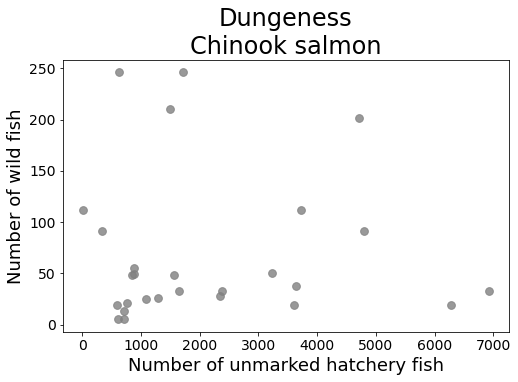

In [32]:
fig1 = plt.figure(figsize=(8,5))
plt.scatter(data_unmarked_dungeness_chinook['chinook0_dungeness_unmarked'],
           data_unmarked_dungeness_chinook['chinook0_dungeness_wild_num'], alpha = 0.8, color = 'gray', s = 60)
plt.xlabel('Number of unmarked hatchery fish', fontsize = 18)
plt.ylabel('Number of wild fish', fontsize = 18)
plt.title('Dungeness\nChinook salmon', fontsize  = 24)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig(output_string + 'dungeness/hatchery_chinook0_uamarked_hatchery.jpeg')

In [33]:
data_unmarked_dungeness_chinook.to_csv(output_string+'dungeness/unmarked_hatchery_chinook_corrected.csv')
data_unmarked_dungeness_coho.to_csv(output_string+'dungeness/unmarked_hatchery_coho_corrected.csv')

## Puyallup

In [37]:
### read csv file with hatchery releases

df = pd.read_csv(data_string + "puyallup/puyallup_2004-2021_rmis.csv", header = 0)

df['Date'] = pd.to_datetime(df['Date'])

df

,Unnamed: 0,Date,Unnamed: 0_x,flow,secchi_depth,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,...,year,doy_original,Unnamed: 0_y,lunar_phase,photoperiod,first_release_date,total,unmarked,prop_unmarked,chinook0_wild_prop
0,0,2004-02-29,0.0,1050.000000,150.0,8.50,13.75,22.25,0.0,0.000000,...,2004.0,60.0,70,0.581360,11.100000,NaN,NaN,NaN,NaN,NaN
1,1,2004-03-01,1.0,982.000000,150.0,10.75,15.25,26.00,0.0,0.000000,...,2004.0,61.0,71,0.672588,11.166667,NaN,NaN,NaN,NaN,NaN
2,2,2004-03-02,2.0,923.000000,150.0,10.25,13.75,24.00,1.0,0.097561,...,2004.0,62.0,72,0.758745,11.216667,NaN,NaN,NaN,NaN,NaN
3,3,2004-03-03,3.0,955.000000,150.0,10.25,14.25,24.50,0.0,0.000000,...,2004.0,63.0,73,0.836781,11.283333,NaN,NaN,NaN,NaN,NaN
4,4,2004-03-04,4.0,1300.000000,150.0,9.25,15.00,24.25,0.0,0.000000,...,2004.0,64.0,74,0.903295,11.333333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,2021-08-06,217.0,1065.343750,15.0,NaN,NaN,NaN,NaN,NaN,...,2021.0,218.0,6438,0.068349,14.750000,NaN,NaN,NaN,NaN,NaN
6369,6369,2021-08-07,218.0,1294.895833,15.0,NaN,NaN,NaN,NaN,NaN,...,2021.0,219.0,6439,0.027146,14.700000,NaN,NaN,NaN,NaN,NaN
6370,6370,2021-08-08,219.0,1296.593750,30.0,NaN,NaN,NaN,NaN,NaN,...,2021.0,220.0,6440,0.004917,14.650000,NaN,NaN,NaN,NaN,NaN
6371,6371,2021-08-09,220.0,875.979167,15.0,NaN,NaN,NaN,NaN,NaN,...,2021.0,221.0,6441,0.003901,14.616667,NaN,NaN,NaN,NaN,NaN


In [41]:
chinook0_list = df['Date'][~np.isnan(df['total'])]
# print(chinook0_list)

chinook0_hatchery_list = []
chinook0_hatchery_num_list = []
chinook0_wild_list = []
chinook0_wild_num_list = []
chinook0_prop_wild_list = []

for i in chinook0_list.index:
    if len(df['chinook0_hatchery_perhour']) < i+10:
        length_dataframe =  len(df['chinook0_hatchery_perhour'])
    else:
        length_dataframe = i+10
    if np.isnan(np.max(df['chinook0_hatchery_perhour'][i:length_dataframe])):
        chinook0_hatchery_list.append(np.nan)
        chinook0_hatchery_num_list.append(np.nan)
        chinook0_wild_list.append(np.nan)
        chinook0_wild_num_list.append(np.nan)
        chinook0_prop_wild_list.append(np.nan)
    else:
        index = df['chinook0_hatchery_perhour'][df['chinook0_hatchery_perhour']==
                                                np.max(df['chinook0_hatchery_perhour'][i:length_dataframe])].index[0]
        chinook0_hatchery_list.append(df['chinook0_hatchery_perhour'][index])
        chinook0_hatchery_num_list.append(df['chinook0_hatchery_num'][index])
        chinook0_wild_list.append(df['chinook0_wild_perhour'][index])
        chinook0_wild_num_list.append(df['chinook0_wild_num'][index])
        chinook0_prop_wild_list.append(df['chinook0_wild_perhour'][index]/(
            df['chinook0_hatchery_perhour'][index]+df['chinook0_wild_perhour'][index]))
# print(chinook0_prop_wild_list)

data_unmarked_chinook_puyallup = np.array([chinook0_list, 
                                  df['unmarked'][chinook0_list.index],
                                  chinook0_wild_num_list,
                                  chinook0_hatchery_num_list,
                                  df['prop_unmarked'][chinook0_list.index],
                                  chinook0_prop_wild_list])

data_unmarked_puyallup_chinook = pd.DataFrame(np.transpose(data_unmarked_chinook_puyallup), columns = ['chinook0_puyallup_Date',
                                                                               'chinook0_puyallup_unmarked', 
                                                                               'chinook0_puyallup_wild_num',
                                                                                'chinook0_puyallup_hatchery_num',
                                                                               'chinook0_puyallup_unmarked_prop', 
                                                                               'chinook0_puyallup_wild_prop'])
# data_unmarked_puyallup_chinook['chinook0_puyallup_year'] = data_unmarked_puyallup_chinook['chinook0_puyallup_Date'].dt.year

data_unmarked_puyallup_chinook


,chinook0_puyallup_Date,chinook0_puyallup_unmarked,chinook0_puyallup_wild_num,chinook0_puyallup_hatchery_num,chinook0_puyallup_unmarked_prop,chinook0_puyallup_wild_prop
0,2004-05-26,18071,NaN,NaN,0.0109743,0.157706
1,2005-05-25,0,28,9258,0,0.00301529
2,2006-05-30,10698,32,5404,0.00761623,0.00588668
3,2006-06-02,2266,28,341,0.00890076,0.0758808
4,2007-06-05,8465,31,19247,0.00470859,0.00160805
5,2008-06-13,6408,11,502,0.00377942,0.0214425
6,2010-05-27,1344,17,1849,0.00351007,0.0091104
7,2011-05-25,2345,98,7661,0.00426364,0.0126305
8,2011-05-26,1604,98,7661,0.00739852,0.0126305
9,2011-05-31,0,98,7661,0,0.0126305


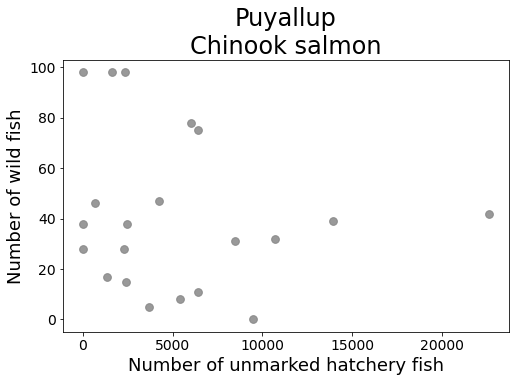

In [44]:
fig1 = plt.figure(figsize=(8,5))
plt.scatter(data_unmarked_puyallup_chinook['chinook0_puyallup_unmarked'],
           data_unmarked_puyallup_chinook['chinook0_puyallup_wild_num'], alpha = 0.8, color = 'gray', s = 60)
plt.xlabel('Number of unmarked hatchery fish', fontsize = 18)
plt.ylabel('Number of wild fish', fontsize = 18)
plt.title('Puyallup\nChinook salmon', fontsize  = 24)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig(output_string + 'puyallup/chinook0_unmarked_hatchery.jpeg')

In [43]:
data_unmarked_puyallup_chinook.to_csv(output_string+'puyallup/unmarked_hatchery_chinook_corrected.csv')

## Skagit

In [46]:
### read csv file with hatchery releases

df = pd.read_csv(output_string + "skagit/skagit_2010-2022_rmis.csv", header = 0)

df['Date'] = pd.to_datetime(df['Date'])

df

,Unnamed: 0,Date,doy,year,chinook0_wild_num,chinook0_hatchery_num,coho1_wild_num,coho1_hatchery_num,In,unmarked_chinook0,total_chinook0_release,prop_unmarked_chinook0,unmarked_coho1,total_coho1_release,prop_unmarked_coho1
0,0,2010-01-20,20,2010,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2010-01-21,21,2010,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2010-01-22,22,2010,17.0,0.0,0.0,0.0,48.416667,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2010-01-23,23,2010,25.0,0.0,0.0,0.0,28.583333,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2010-01-24,24,2010,35.0,0.0,0.0,0.0,29.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,2049,2022-07-09,190,2022,17.0,28.0,1.0,0.0,19.000000,NaN,NaN,NaN,NaN,NaN,NaN
2050,2050,2022-07-10,191,2022,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2051,2051,2022-07-11,192,2022,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2052,2052,2022-07-12,193,2022,7.0,5.0,0.0,0.0,19.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
chinook0_list = df['Date'][~np.isnan(df['total_chinook0_release'])]
# print(chinook0_list)

# chinook0_hatchery_list = []
chinook0_hatchery_num_list = []
# chinook0_wild_list = []
chinook0_wild_num_list = []
chinook0_prop_wild_list = []

for i in chinook0_list.index:
    if len(df['chinook0_hatchery_num']) < i+10:
        length_dataframe =  len(df['chinook0_hatchery_num'])
    else:
        length_dataframe = i+10
    if np.isnan(np.max(df['chinook0_hatchery_num'][i:length_dataframe])):
        chinook0_hatchery_list.append(np.nan)
        chinook0_hatchery_num_list.append(np.nan)
        chinook0_wild_list.append(np.nan)
        chinook0_wild_num_list.append(np.nan)
        chinook0_prop_wild_list.append(np.nan)
    else:
        index = df['chinook0_hatchery_num'][df['chinook0_hatchery_num']==
                                                np.max(df['chinook0_hatchery_num'][i:length_dataframe])].index[0]
#         chinook0_hatchery_list.append(df['chinook0_hatchery_perhour'][index])
        chinook0_hatchery_num_list.append(df['chinook0_hatchery_num'][index])
#         chinook0_wild_list.append(df['chinook0_wild_perhour'][index])
        chinook0_wild_num_list.append(df['chinook0_wild_num'][index])
        chinook0_prop_wild_list.append(df['chinook0_wild_num'][index]/(
            df['chinook0_hatchery_num'][index]+df['chinook0_wild_num'][index]))
        

data_unmarked_chinook_skagit = np.array([chinook0_list, 
                                  df['unmarked_chinook0'][chinook0_list.index],
                                  chinook0_wild_num_list,
                                  chinook0_hatchery_num_list,
                                  df['prop_unmarked_chinook0'][chinook0_list.index],
                                  chinook0_prop_wild_list])

data_unmarked_skagit_chinook = pd.DataFrame(np.transpose(data_unmarked_chinook_skagit), columns = ['chinook0_skagit_Date',
                                                                               'chinook0_skagit_unmarked', 
                                                                               'chinook0_skagit_wild_num',
                                                                                'chinook0_skagit_hatchery_num',
                                                                               'chinook0_skagit_unmarked_prop', 
                                                                               'chinook0_skagit_wild_prop'])
# data_unmarked_skagit_chinook['chinook0_skagit_year'] = data_unmarked_skagit_chinook['chinook0_skagit_Date'].dt.year

data_unmarked_skagit_chinook

<ipython-input-55-02af7bd43f83>:28: RuntimeWarning: invalid value encountered in double_scalars
  chinook0_prop_wild_list.append(df['chinook0_wild_num'][index]/(


,chinook0_skagit_Date,chinook0_skagit_unmarked,chinook0_skagit_wild_num,chinook0_skagit_hatchery_num,chinook0_skagit_unmarked_prop,chinook0_skagit_wild_prop
0,2010-05-28,0,1305,921,0,0.586253
1,2010-06-07,0,486,912,0,0.347639
2,2012-06-08,0,327,683,0,0.323762
3,2012-06-15,1177,289,1164,0.0024762,0.198899
4,2013-06-10,1218,91,739,0.00209644,0.109639
5,2013-06-19,0,153,349,0,0.304781
6,2014-06-12,333,82,1152,0.000576599,0.0664506
7,2014-06-25,0,143,468,0,0.234043
8,2015-06-01,1405,78,176,0.00211221,0.307087
9,2015-06-11,7,39,23,3.09541e-05,0.629032


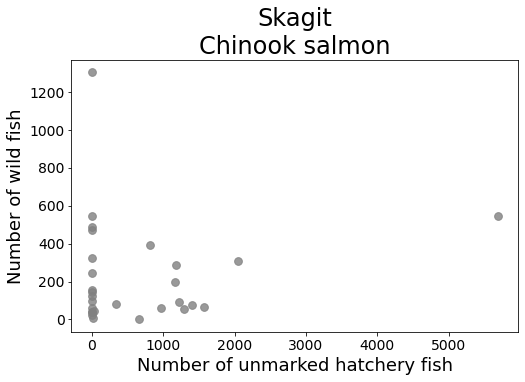

In [56]:
fig1 = plt.figure(figsize=(8,5))
plt.scatter(data_unmarked_skagit_chinook['chinook0_skagit_unmarked'],
           data_unmarked_skagit_chinook['chinook0_skagit_wild_num'], alpha = 0.8, color = 'gray', s = 60)
plt.xlabel('Number of unmarked hatchery fish', fontsize = 18)
plt.ylabel('Number of wild fish', fontsize = 18)
plt.title('Skagit\nChinook salmon', fontsize  = 24)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig(output_string + 'skagit/chinook0_unmarked_hatchery.jpeg')

In [57]:
data_unmarked_skagit_chinook.to_csv(output_string+'skagit/unmarked_hatchery_chinook_corrected.csv')

In [58]:
coho1_list = df['Date'][~np.isnan(df['total_coho1_release'])]
# print(coho1_list)

# coho1_hatchery_list = []
coho1_hatchery_num_list = []
# coho1_wild_list = []
coho1_wild_num_list = []
coho1_prop_wild_list = []

for i in coho1_list.index:
    if len(df['coho1_hatchery_num']) < i+10:
        length_dataframe =  len(df['coho1_hatchery_num'])
    else:
        length_dataframe = i+10
    if np.isnan(np.max(df['coho1_hatchery_num'][i:length_dataframe])):
        coho1_hatchery_list.append(np.nan)
        coho1_hatchery_num_list.append(np.nan)
        coho1_wild_list.append(np.nan)
        coho1_wild_num_list.append(np.nan)
        coho1_prop_wild_list.append(np.nan)
    else:
        index = df['coho1_hatchery_num'][df['coho1_hatchery_num']==
                                                np.max(df['coho1_hatchery_num'][i:length_dataframe])].index[0]
#         coho1_hatchery_list.append(df['coho1_hatchery_perhour'][index])
        coho1_hatchery_num_list.append(df['coho1_hatchery_num'][index])
#         coho1_wild_list.append(df['coho1_wild_perhour'][index])
        coho1_wild_num_list.append(df['coho1_wild_num'][index])
        coho1_prop_wild_list.append(df['coho1_wild_num'][index]/(
            df['coho1_hatchery_num'][index]+df['coho1_wild_num'][index]))
        

data_unmarked_coho_skagit = np.array([coho1_list, 
                                  df['unmarked_coho1'][coho1_list.index],
                                  coho1_wild_num_list,
                                  coho1_hatchery_num_list,
                                  df['prop_unmarked_coho1'][coho1_list.index],
                                  coho1_prop_wild_list])

data_unmarked_skagit_coho = pd.DataFrame(np.transpose(data_unmarked_coho_skagit), columns = ['coho1_skagit_Date',
                                                                               'coho1_skagit_unmarked', 
                                                                               'coho1_skagit_wild_num',
                                                                                'coho1_skagit_hatchery_num',
                                                                               'coho1_skagit_unmarked_prop', 
                                                                               'coho1_skagit_wild_prop'])
# data_unmarked_skagit_coho['coho1_skagit_year'] = data_unmarked_skagit_coho['coho1_skagit_Date'].dt.year

data_unmarked_skagit_coho

<ipython-input-58-2e95896c8e48>:28: RuntimeWarning: invalid value encountered in double_scalars
  coho1_prop_wild_list.append(df['coho1_wild_num'][index]/(


,coho1_skagit_Date,coho1_skagit_unmarked,coho1_skagit_wild_num,coho1_skagit_hatchery_num,coho1_skagit_unmarked_prop,coho1_skagit_wild_prop
0,2010-02-11,600,0,0,0.006,NaN
1,2010-05-13,1922,846,291,0.00761188,0.744063
2,2012-02-02,410,0,0,0.00390476,NaN
3,2012-03-13,0,0,0,0,NaN
4,2012-04-11,103,53,13,0.0100019,0.80303
5,2012-04-12,0,53,13,0,0.80303
6,2012-05-01,1705,3,2,0.0064462,0.6
7,2012-05-09,0,438,1682,0,0.206604
8,2013-04-09,82,24,431,0.0397672,0.0527473
9,2013-04-10,173,24,431,0.0400093,0.0527473


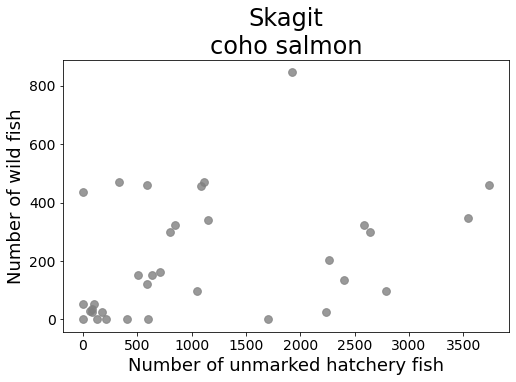

In [60]:
fig1 = plt.figure(figsize=(8,5))
plt.scatter(data_unmarked_skagit_coho['coho1_skagit_unmarked'],
           data_unmarked_skagit_coho['coho1_skagit_wild_num'], alpha = 0.8, color = 'gray', s = 60)
plt.xlabel('Number of unmarked hatchery fish', fontsize = 18)
plt.ylabel('Number of wild fish', fontsize = 18)
plt.title('Skagit\ncoho salmon', fontsize  = 24)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig(output_string + 'skagit/coho1_unmarked_hatchery.jpeg')

In [61]:
data_unmarked_skagit_coho.to_csv(output_string+'skagit/unmarked_hatchery_coho_corrected.csv')